## Machine Learning Model Visual Evaluation Example

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ROCAUC, ClassBalance
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy
import pandas

def create_model(dropout_rate=0.0):
    # create model
    model = Sequential()
    model.add(Dense(12, activation='relu'))
    # input_dim=29,
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, init='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Import previously created model see classify.ipynb
# Read in data then split data into training and test sets
# Create Label column defining whether or not the article's upvotes exceed the average vote for the subreddit
# Split data into training and test sets

pipeline = joblib.load('datascience_keras.xz')
data = pd.read_csv('processed_datascience.csv.bz2')

data['z_scores'] = np.abs((data.ups-data.ups.mean())/data.ups.std())
data = data[data['z_scores']<= 2.5]

## Optional: Log transformation of up-votes
data['log_ups'] = np.log1p(data['ups'])

# Create Label column defining whether or not the article's upvotes exceed the average vote for the subreddit
data['gtavg'] = data.log_ups > data.log_ups.mean()

# Change Target label to Success or Failure
booldict = {True: 'Success', False: 'Failure'}
data['gtavg'] = data.gtavg.map(booldict)



train_X, test_X, train_y, test_y = train_test_split(data.title, 
                                                    data.gtavg, 
                                                    test_size=0.20,
                                                    random_state=25)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [17]:
data[:2]

,id,subreddit,title,ups,url,created_utc,z_scores,log_ups,gtavg
0,7t0918,r/datascience,Help Wanted: Graduate School/Career Advice for...,0,https://www.reddit.com/r/datascience/comments/...,1.516922e+09,0.458747,0.000000,Failure
2,7szbq4,r/datascience,Looking for MOOCs with actual projects to add ...,27,https://www.reddit.com/r/datascience/comments/...,1.516914e+09,0.796093,3.332205,Success


### Classification Report

In [4]:
visualizer = ClassificationReport(pipeline)
visualizer.fit(train_X, train_y)
visualizer.score(test_X,test_y)
visualizer.poof()

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

### Confusion Matrix

In [5]:
cm = ConfusionMatrix(pipeline)
cm.fit(train_X, train_y)
cm.score(test_X, test_y)
cm.poof()

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

### ROC AUC

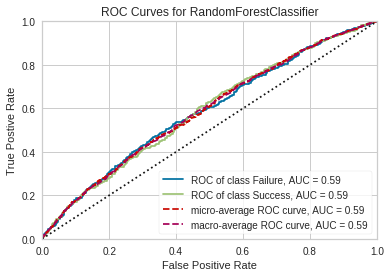

In [10]:
visualizer = ROCAUC(pipeline)
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
g=visualizer.poof()

### Class Balance

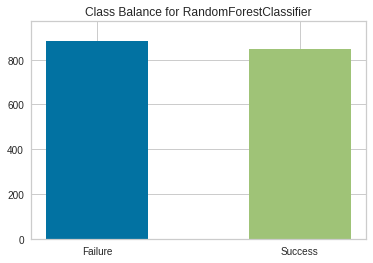

In [11]:
visualizer = ClassBalance(pipeline)
visualizer.fit(train_X, train_y)
visualizer.score(test_X, test_y)
g=visualizer.poof()